In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions
import plotly.graph_objects as go
from matplotlib import pyplot as plt
import matplotlib.mlab as mlab
from scipy.stats import norm
from plotly.subplots import make_subplots
from scipy import stats
from datetime import date


In [2]:
df = pd.read_excel('site_info_ver_2.3.xlsx')

In [240]:
df.columns

Index(['Model_number', 'Date', 'Site_Name', 'Israelis_Count', 'Tourists_Count',
       'Total', 'region_Central', 'region_Judea_Samaria', 'region_North',
       'region_South', 'is_weekend', 'operations', 'is_jewish_holiday',
       'is_jewish_vacation', 'is_muslims_holiday', 'is_muslims_vacation',
       'is_camping', 'special_activity', 'visit_duration', 'is_jewishHeritage',
       'is_muslimsHeritage', 'is_christiansHeritage', 'is_nationalPark',
       'is_natureReserve', 'is_archaeology', 'is_religion', 'is_animals',
       'is_heritage', 'is_water', 'is_cave', 'is_lookout', 'pm10', 'pm2.5',
       'nox', 'so2', 'Temperature', 'is_HeatWave', 'Tel_Aviv-Yafo_pm10',
       'Jerusalem_pm10', 'Haifa_pm10', 'Ashkelon_pm10', 'Beer-Sheva_pm10',
       'Tel_Aviv-Yafo_pm2.5', 'Jerusalem_pm2.5', 'Haifa_pm2.5',
       'Ashkelon_pm2.5', 'Beer-Sheva_pm2.5', 'Tel_Aviv-Yafo_nox',
       'Jerusalem_nox', 'Haifa_nox', 'Ashkelon_nox', 'Beer-Sheva_nox',
       'Tel_Aviv-Yafo_so2', 'Jerusalem_so2', 'Ha

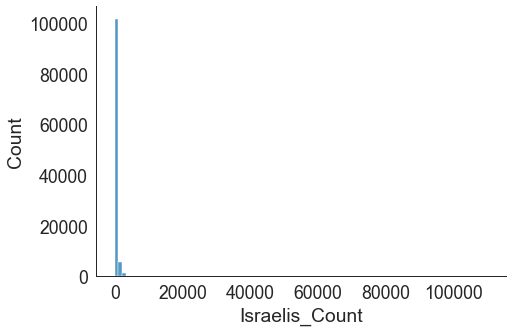

In [241]:
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df, x="Israelis_Count", kind="hist", bins = 100, aspect = 1.5)

In [242]:
height = df["Tourists_Count"].values

,sumsquare_error,aic,bic,kl_div
gamma,0.000041,2665.901613,-2.368792e+06,inf
beta,0.000052,26531.892893,-2.342201e+06,inf
norm,0.000062,23440.121472,-2.322565e+06,inf
lognorm,0.000063,2421.849960,-2.321094e+06,inf
burr,0.000067,2288.685430,-2.314694e+06,inf


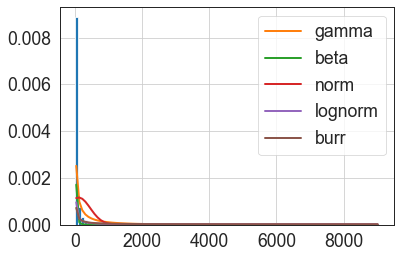

In [243]:
f = Fitter(height,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()

In [244]:
from scipy import stats

In [245]:
# האם יש הבדל בכניסות תיירים לישראלים בימים של גלי חום
from scipy.stats import mannwhitneyu

from numpy import mean
from numpy import std
data1=df[df['is_HeatWave']==1]["Israelis_Count"]
data2=df[df['is_HeatWave']==1]["Tourists_Count"]

stat, p = stats.wilcoxon(data1,data2,zero_method='wilcox')
print('Statistics=%.3f, p=%.10f' % (stat, p))
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Statistics=132377900.000, p=0.0000000000
Different distribution (reject H0)


In [246]:
corr_df = df.corr(method = 'pearson')

In [247]:
fig = go.Figure()
fig.add_traces(go.Heatmap(
    z=corr_df, 
    x=corr_df.columns, 
    y=corr_df.columns,
    zmax=1, 
    zmin=-1
))
fig.update_layout({
    'title':"Features Correlation Heatmap- Pearson"
})

In [248]:
corr_df = df.corr(method = 'spearman')
fig = go.Figure()
fig.add_traces(go.Heatmap(
    z=corr_df, 
    x=corr_df.columns, 
    y=corr_df.columns,
    zmax=1, 
    zmin=-1
))
fig.update_layout({
    'title':"Features Correlation Heatmap- Spearman"
})

In [249]:
temp = df['nox'].dropna()

In [3]:
pivot_total = df.pivot_table(index='Date', values='Total',aggfunc='sum',dropna=True)
pivot_israelis = df.pivot_table(index='Date', values='Israelis_Count',aggfunc='sum',dropna=True)
pivot_tourists = df.pivot_table(index='Date', values='Tourists_Count',aggfunc='sum',dropna=True)
pivot_pm10 = df.pivot_table(index='Date', values='pm10',aggfunc='sum',dropna=True)
pivot_pm2 = df.pivot_table(index='Date', values='pm2.5',aggfunc='sum',dropna=True)
pivot_so2 = df.pivot_table(index='Date', values='so2',aggfunc='sum',dropna=True)
pivot_nox = df.pivot_table(index='Date', values='nox',aggfunc='sum',dropna=True)
pivot_temp = df.pivot_table(index='Date', values='Temperature',dropna=True)



In [ ]:
fig = make_subplots(rows=3, cols=3)

In [ ]:
xrange = np.arange(-4.5,5,0.0025)
norm = go.Scatter(x=xrange, 
                  y=stats.norm(loc=0, scale=1).pdf(xrange), 
                  mode='lines',
                  line=dict(width=1.5),
                  name='Normal',
                 )

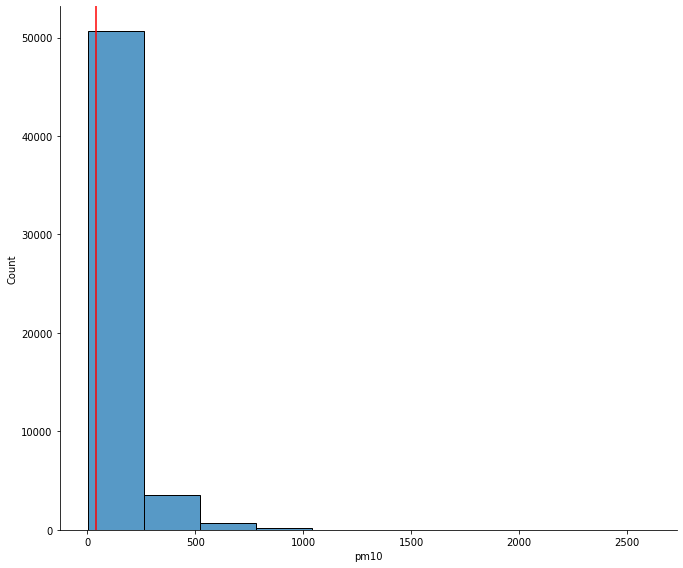

In [18]:
sns.displot(df['pm10'],bins=10,height=8,aspect=1.2)
plt.axvline(38,color='red')


In [ ]:
trace0 = go.Histogram(x=pivot_total['Total'],name='total')
trace1 = go.Histogram(x=pivot_israelis ['Israelis_Count'],name = 'israelis_count')
trace2 = go.Histogram(x=pivot_tourists ['Tourists_Count'], name = 'tourists_count')
trace3 = go.Histogram(x=pivot_pm10 ['pm10'],name = 'pm10')
trace4 = go.Histogram(x=pivot_pm2 ['pm2.5'], name = 'pm2.5')
trace5 = go.Histogram(x=pivot_so2 ['so2'],name = 'so2')
trace6 = go.Histogram(x=pivot_nox ['nox'], name = 'nox')
trace7 = go.Histogram(x=pivot_temp ['Temperature'], name = 'temperature')
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 1, 3)
fig.append_trace(trace3, 2, 1)
fig.append_trace(trace4, 2, 2)
fig.append_trace(trace5, 2, 3)
fig.append_trace(trace6, 3, 1)
fig.append_trace(trace7, 3, 2)
fig.update_layout({'width': 1100,'height':550,'title':'Data Histograms'})
fig.show()

In [ ]:
def is_normal(col):
    #from statsmodels.stats import weightstats as stests
    if col == 'Temperature':
        pivot = df.pivot_table(index= 'Date',values = col)
    else : pivot = df.pivot_table(index= 'Date',values = col, aggfunc='sum')
    res = False
    #smean = df[col].mean()
    #print(smean)

    # H0 if normal, H1 otherwise
    stat ,pval = stats.normaltest(pivot[col])
    if(pval > 0.05): # normal
        res = True
    return stat,pval,res

In [ ]:
#check for normal distribution
cols = ['Total','Israelis_Count','Tourists_Count','pm10','pm2.5','nox','so2','Temperature']
for col in cols:
    stat , pval, res = is_normal(col)
    print(col+': '+ 'Pval = '+str(float(pval))+', is normal = '+str(res))

Total: Pval = 1.0998801163458052e-255, is normal = False
Israelis_Count: Pval = 2.27166668979898e-302, is normal = False
Tourists_Count: Pval = 3.9502831502565044e-17, is normal = False
pm10: Pval = 0.0, is normal = False
pm2.5: Pval = 2.7576402594185245e-298, is normal = False
nox: Pval = 4.786995707851581e-25, is normal = False
so2: Pval = 1.8549342675842942e-70, is normal = False
Temperature: Pval = 2.4381688975205274e-158, is normal = False


In [ ]:
sites = list(df.Site_Name.unique())
sites

In [ ]:
def sign_test(tests_res):
    tests_res=np.array(tests_res)
    ones=tests_res.sum() 

    n = len(tests_res)
    p = 0.5
    p_val=0
    for k in range(ones,n):
        p_val+= stats.binom.pmf(k,n,p)
    return 2*p_val